## Employees leaving prematurely

### Introduction

The data set for this example contains data on **employee turnover**. These data are intended to be used for predicting which employees will leave the company prematurely, but I use them here for illustrating some basic exporatory tools provided by the Python package **Pandas**.

The data set covers 14,999 employees of a corporation and contains 10 attributes:

* The employee satisfaction level, in the 0-1 range (`satisfaction`).

* The last evaluation by his/her superior, in the 0-1 range (`eval`).

* The number of projects in which the employee has participated (`projects`).

* The average monthly hours worked (`hours`).

* The time spent at the company, in years (`time`).

* A dummy indicating whether the employee has had a work accident (`accident`).

* A dummy indicating whether the employee has had a promotion in the last 5 years (`promotion`).

* The actual department to which the employee is assigned, with 10 values (`dept`).

* The actual salary, with three levels, low, medium and high (`salary`).

* A  dummy indicating whether the employee has left the company (`left`).

### Importing the data

We first load the package Pandas. The function `read_csv` imports data from CSV files. In this case, we import the data from a remote location (a GitHub repository). 

In [1]:
import pandas as pd
turnover = pd.read_csv('https://raw.githubusercontent.com/mcanela-iese/' +
    'DataSci_Course/master/Data/turnover.csv')

We perform some checks on the data frame, starting with the dimensions. 

In [2]:
turnover.shape

(14999, 10)

What the methods `head` and `tail` do is obvious. We can use an argument which controls the number of rows returned. The default is 6. So we can print the first 10 rows of our data set as follows.

In [3]:
print(turnover.head(10))

   satisfaction  eval  projects  hours  time  accident  left  promotion  \
0          0.38  0.53         2    157     3         0     1          0   
1          0.80  0.86         5    262     6         0     1          0   
2          0.11  0.88         7    272     4         0     1          0   
3          0.72  0.87         5    223     5         0     1          0   
4          0.37  0.52         2    159     3         0     1          0   
5          0.41  0.50         2    153     3         0     1          0   
6          0.10  0.77         6    247     4         0     1          0   
7          0.92  0.85         5    259     5         0     1          0   
8          0.89  1.00         5    224     5         0     1          0   
9          0.42  0.53         2    142     3         0     1          0   

    dept  salary  
0  sales     low  
1  sales  medium  
2  sales  medium  
3  sales     low  
4  sales     low  
5  sales     low  
6  sales     low  
7  sales     low  
8  

The **structure** of a `pandas` data frame can also be explored with the method `info`. Actually, `turnover` is a data frame, with 14,999 and 10 columns. Note that the columns `dept` and `salary` have **string** type, which Pandas reports as "object", while the rest are **numeric**. Although the distinction between float and integer types may be interesting for the programmers concerned with memory management, it is irrelevant here, so I skip that. For the actual analysis, both things are "numbers". 

In [4]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction    14999 non-null float64
eval            14999 non-null float64
projects        14999 non-null int64
hours           14999 non-null int64
time            14999 non-null int64
accident        14999 non-null int64
left            14999 non-null int64
promotion       14999 non-null int64
dept            14999 non-null object
salary          14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Summarizing numeric variables

For the numeric columns, the method `describe` produces a conventional **statistical summary**. `iloc` is used to select the numeric columns using their index instead of the names.

In [5]:
print(turnover.iloc[:, :8].describe().round(2))

       satisfaction      eval  projects     hours      time  accident  \
count      14999.00  14999.00  14999.00  14999.00  14999.00  14999.00   
mean           0.61      0.72      3.80    201.05      3.50      0.14   
std            0.25      0.17      1.23     49.94      1.46      0.35   
min            0.09      0.36      2.00     96.00      2.00      0.00   
25%            0.44      0.56      3.00    156.00      3.00      0.00   
50%            0.64      0.72      4.00    200.00      3.00      0.00   
75%            0.82      0.87      5.00    245.00      4.00      0.00   
max            1.00      1.00      7.00    310.00     10.00      1.00   

           left  promotion  
count  14999.00   14999.00  
mean       0.24       0.02  
std        0.43       0.14  
min        0.00       0.00  
25%        0.00       0.00  
50%        0.00       0.00  
75%        0.00       0.00  
max        1.00       1.00  


### Summarizing categorical variables

The two categorical variables come in the data frame `turnover` as string (object) columns. The method `value_counts()` produces a table (more specifically, a Pandas series) which counts the occurrences of every value. 

In [6]:
tab1 = turnover['dept'].value_counts()
tab1

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

Cross-tabulation is performed in `pandas` with the function `crosstab`. The first column specified comes in the rows, and the second one in the columns. Note that `crosstab` returns a data frame. In the example below, the department works as the index, and the three values of the salary as the columns.

In [7]:
tab2 = pd.crosstab(turnover['dept'], turnover['salary'])
print(tab2)

salary       high   low  medium
dept                           
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


### Pivot tables

**Pivot tables** are created in `pandas` with the function `pivot_table`, which also returns a data frame. This function has four arguments: the data frame (`data`), the grouping variable (`index`), the variable aggregated (`values`) and the aggregation function (`aggfunc`).

In [8]:
tab3 = pd.pivot_table(data=turnover, index=['salary'], values=['left'],
    aggfunc='mean')
print(tab3.round(3))

         left
salary       
high    0.066
low     0.297
medium  0.204


Some people prefer a graphical version of such tables. For the pivot table `tab3`, the natural visualization would be a **bar plot**, which can be produced with the method `plot.bar`, as you can see below. First, we load the method `pyplot` of the package `matplotlib`, whis is typically used for plotting. The first line, which starts with the percentage symbol, is used in Jupyter notebooks for showing plots (instead of the method `plt.show` used in the console)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

Now, we ask for the plot.

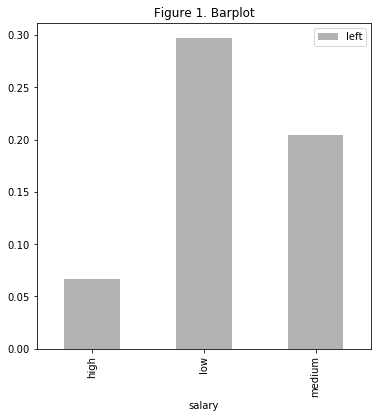

In [10]:
tab3.plot.bar(title='Figure 1. Barplot', figsize=(6,6), color='0.7')

Another example of a pivot table follows.

In [11]:
tab4 = pd.pivot_table(data=turnover, index=['dept'], values=['left'],
    aggfunc='mean')
print(tab4.round(3))

              left
dept              
IT           0.222
RandD        0.154
accounting   0.266
hr           0.291
management   0.144
marketing    0.237
product_mng  0.220
sales        0.245
support      0.249
technical    0.256


### Correlation

**Correlation matrices** are produced in `pandas` with the method `corr`, which returns a data frame.

In [12]:
R = turnover.iloc[:, 0:8].corr()
print(R.round(2))

              satisfaction  eval  projects  hours  time  accident  left  \
satisfaction          1.00  0.11     -0.14  -0.02 -0.10      0.06 -0.39   
eval                  0.11  1.00      0.35   0.34  0.13     -0.01  0.01   
projects             -0.14  0.35      1.00   0.42  0.20     -0.00  0.02   
hours                -0.02  0.34      0.42   1.00  0.13     -0.01  0.07   
time                 -0.10  0.13      0.20   0.13  1.00      0.00  0.14   
accident              0.06 -0.01     -0.00  -0.01  0.00      1.00 -0.15   
left                 -0.39  0.01      0.02   0.07  0.14     -0.15  1.00   
promotion             0.03 -0.01     -0.01  -0.00  0.07      0.04 -0.06   

              promotion  
satisfaction       0.03  
eval              -0.01  
projects          -0.01  
hours             -0.00  
time               0.07  
accident           0.04  
left              -0.06  
promotion          1.00  


### Plotting

The **histogram** allows a quick glance at the distribution of a numeric variable. We use the function `hist` of `matplotlib.pyplot`. Note the way in which the graphical parameters are specified. We have to wait until the end to run this piece of code, in order to have all the complete specification fulfilled. 

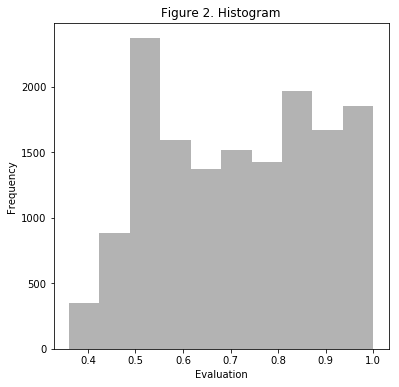

In [13]:
plt.figure(figsize=(6,6))
plt.hist(turnover['eval'], color='0.7')
plt.title('Figure 2. Histogram')
plt.xlabel('Evaluation')
plt.ylabel('Frequency')

**Scatter plots** are obtained with the function `scatter`, in a similar way. The parameter `s` controls the size of the dots, which has to be decided taking into account the number of dots. The value of this parameter is the square of the marker size in points.

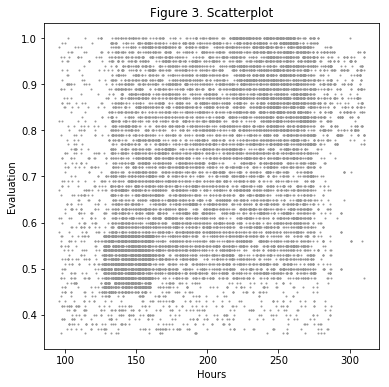

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x=turnover['hours'], y=turnover['eval'], color='0.6', s=1)
plt.title('Figure 3. Scatterplot')
plt.xlabel('Hours')
plt.ylabel('Evaluation')